In [1]:
from bokeh.io import output_notebook, show, export_png, export_svg
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook(hide_banner=True)

from IPython.display import SVG, display

import numpy as np
from pathlib import Path
from jsonlines import jsonlines
from pprint import pprint
from random import randint

In [2]:
RANDOM_QUERY_LOG = "../logs_archive/least_confidence_50i_50n_kpwr-full.metrics.jsonl"
LEAST_CONFIDENCE_LOG = "../logs_archive/random_50i_50n_kpwr-full.metrics.jsonl"
FIGURES_DIR = Path("figures") / Path("prf-metrics")
FIGURES_DIR.mkdir(exist_ok=True, parents=True)

ITERATIONS = 50
N_INSTANCES = 50

VISUALS_NAME = "final_pl"

In [3]:
with jsonlines.open(RANDOM_QUERY_LOG) as reader_rand:
    random_log_data = [j for j in reader_rand]
rand_idx = randint(0, len(random_log_data) - 1)
pprint(random_log_data[rand_idx], compact=True)

{'_date': '21-11-2022 15:40:27',
 '_iteration': 21,
 '_iteration_time': 34.99876427650452,
 '_labels_count': {'_all': 1654,
                   'nam_liv_person': 934,
                   'nam_loc_gpe_city': 386,
                   'nam_loc_gpe_country': 334},
 '_sc_loss': 1847.384678721428,
 '_spans_count': 1654,
 'spans_sc_f': 0.37752414398595263,
 'spans_sc_p': 0.8037383177570093,
 'spans_sc_per_type': {'nam_liv_person': {'f': 0.49117647058823527,
                                          'p': 0.8126520681265207,
                                          'r': 0.3519494204425711},
                       'nam_loc_gpe_city': {'f': 0.31272727272727274,
                                            'p': 0.7610619469026548,
                                            'r': 0.19679633867276888},
                       'nam_loc_gpe_country': {'f': 0.05434782608695653,
                                               'p': 0.9090909090909091,
                                               'r': 0.0280

In [4]:
with jsonlines.open(LEAST_CONFIDENCE_LOG) as reader_lc:
    least_confidence_log_data = [j for j in reader_lc]
rand_idx = randint(0, len(least_confidence_log_data) - 1)
pprint(least_confidence_log_data[rand_idx], compact=True)

{'_date': '21-11-2022 15:38:08',
 '_iteration': 28,
 '_iteration_time': 18.81359100341797,
 '_labels_count': {'_all': 2168,
                   'nam_liv_person': 1162,
                   'nam_loc_gpe_city': 559,
                   'nam_loc_gpe_country': 447},
 '_sc_loss': 2451.081841945648,
 '_spans_count': 2168,
 'spans_sc_f': 0.477668672790624,
 'spans_sc_p': 0.5332390381895332,
 'spans_sc_per_type': {'nam_liv_person': {'f': 0.5768880800727934,
                                          'p': 0.5076060848678943,
                                          'r': 0.6680716543730242},
                       'nam_loc_gpe_city': {'f': 0.39867109634551495,
                                            'p': 0.7272727272727273,
                                            'r': 0.2745995423340961},
                       'nam_loc_gpe_country': {'f': 0.0, 'p': 0.0, 'r': 0.0}},
 'spans_sc_r': 0.4325874928284567,
 'speed': 8888.23899603527,
 'token_acc': 1.0,
 'token_f': 1.0,
 'token_p': 1.0,
 'token_r':

In [5]:
random_iterations, random_entities_num, random_fscores, random_precs, random_recalls, random_losses = [], [], [], [], [], []
lc_iterations, lc_entities_num, lc_fscores, lc_precs, lc_recalls, lc_losses = [], [], [], [], [], []
assert len(random_log_data) == len(least_confidence_log_data)

for rand_log_line, lc_log_line in zip(random_log_data, least_confidence_log_data):
    random_iterations.append(rand_log_line["_iteration"])
    random_entities_num.append(rand_log_line["_spans_count"])
    random_precs.append(rand_log_line["spans_sc_p"])
    random_recalls.append(rand_log_line["spans_sc_r"])
    random_fscores.append(rand_log_line["spans_sc_f"])
    random_losses.append(rand_log_line["_sc_loss"])

    lc_iterations.append(lc_log_line["_iteration"])
    lc_entities_num.append(lc_log_line["_spans_count"])
    lc_precs.append(lc_log_line["spans_sc_p"])
    lc_recalls.append(lc_log_line["spans_sc_r"])
    lc_fscores.append(lc_log_line["spans_sc_f"])
    lc_losses.append(lc_log_line["_sc_loss"])

assert len(random_iterations) == len(lc_iterations)
assert len(random_iterations) == len(random_fscores)
assert len(lc_iterations) == len(lc_fscores)
assert len(lc_precs) == len(random_precs)
assert len(lc_recalls) == len(random_recalls)

## Wartość miary F na przestrzeni liczby oznaczonych encji

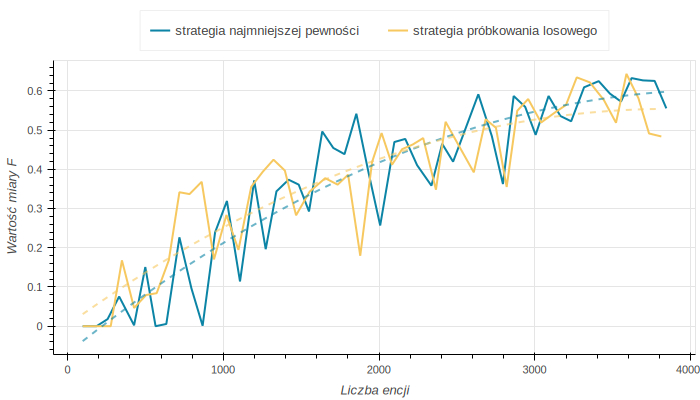

In [6]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania least-confidence)",
           x_axis_label="Liczba encji",
           y_axis_label="Wartość miary F",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
# p.y_range = Range1d(0, 1)
# p.x_range = Range1d(0, 3_500)

p.line(lc_entities_num, lc_fscores, legend_label="strategia najmniejszej pewności", color="#0B84A5", line_width=2)
p.line(random_entities_num, random_fscores, legend_label="strategia próbkowania losowego", color="#F6C85F", line_width=2)

lc_par, rand_par = np.poly1d(np.polyfit(lc_entities_num, lc_fscores, 2)), np.poly1d(np.polyfit(random_entities_num, random_fscores, 2 ))
lc_y_fitted = [lc_par(x)  for x in lc_entities_num]
rand_y_fitted = [rand_par(x) for x in random_entities_num]

p.line(lc_entities_num, lc_y_fitted, color="#0B84A5", line_width=2, line_dash="dashed", line_alpha=0.6)
p.line(random_entities_num, rand_y_fitted, color="#F6C85F", line_width=2, line_dash="dashed", line_alpha=0.6)

p.legend[0].orientation = "horizontal"
p.legend[0].location = "bottom_center"
p.add_layout(p.legend[0], "above")
p.legend[0].spacing = 30

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_both_strat_fscore_on_ents_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

## Wartość komplentości (ang. recall) na przestrzeni liczby encji

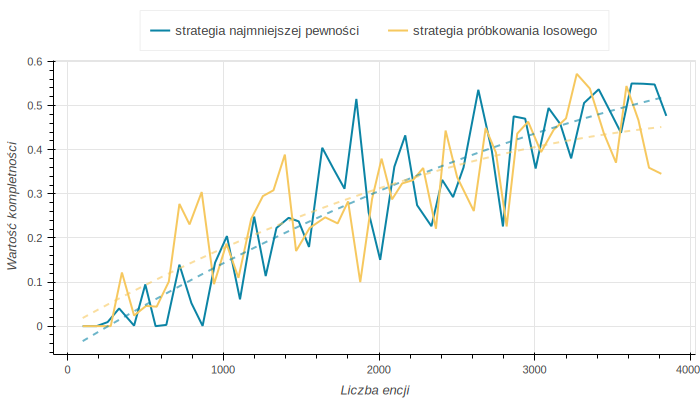

In [7]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania least-confidence)",
           x_axis_label="Liczba encji",
           y_axis_label="Wartość kompletności",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
# p.y_range = Range1d(0, 1)
# p.x_range = Range1d(0, 3_500)

p.line(lc_entities_num, lc_recalls, legend_label="strategia najmniejszej pewności", color="#0B84A5", line_width=2)
p.line(random_entities_num, random_recalls, legend_label="strategia próbkowania losowego", color="#F6C85F", line_width=2)

lc_par, rand_par = np.poly1d(np.polyfit(lc_entities_num, lc_recalls, 2)), np.poly1d(np.polyfit(random_entities_num, random_recalls, 2 ))
lc_y_fitted = [lc_par(x)  for x in lc_entities_num]
rand_y_fitted = [rand_par(x) for x in random_entities_num]

p.line(lc_entities_num, lc_y_fitted, color="#0B84A5", line_width=2, line_dash="dashed", line_alpha=0.6)
p.line(random_entities_num, rand_y_fitted, color="#F6C85F", line_width=2, line_dash="dashed", line_alpha=0.6)

p.legend[0].orientation = "horizontal"
p.legend[0].location = "bottom_center"
p.add_layout(p.legend[0], "above")
p.legend[0].spacing = 30

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_both_strat_recall_on_ents_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

## Wartość dokładności (ang. precision) na przestrzeni liczby encji

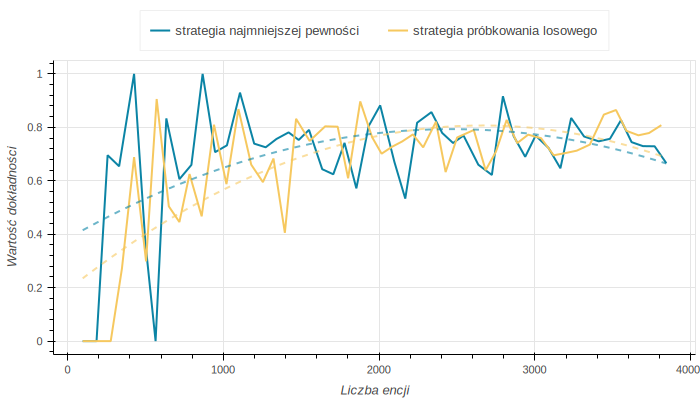

In [8]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania least-confidence)",
           x_axis_label="Liczba encji",
           y_axis_label="Wartość dokładności",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
# p.y_range = Range1d(0, 1)
# p.x_range = Range1d(0, 3_500)

p.line(lc_entities_num, lc_precs, legend_label="strategia najmniejszej pewności", color="#0B84A5", line_width=2)
p.line(random_entities_num, random_precs, legend_label="strategia próbkowania losowego", color="#F6C85F", line_width=2)

lc_par, rand_par = np.poly1d(np.polyfit(lc_entities_num, lc_precs, 2)), np.poly1d(np.polyfit(random_entities_num, random_precs, 2 ))
lc_y_fitted = [lc_par(x)  for x in lc_entities_num]
rand_y_fitted = [rand_par(x) for x in random_entities_num]

p.line(lc_entities_num, lc_y_fitted, color="#0B84A5", line_width=2, line_dash="dashed", line_alpha=0.6)
p.line(random_entities_num, rand_y_fitted, color="#F6C85F", line_width=2, line_dash="dashed", line_alpha=0.6)

p.legend[0].orientation = "horizontal"
p.legend[0].location = "bottom_center"
p.add_layout(p.legend[0], "above")
p.legend[0].spacing = 30

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_both_strat_precision_on_ents_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

## Jakość modelu na przestrzeni iteracji z użyciem strategi próbkowania losowego

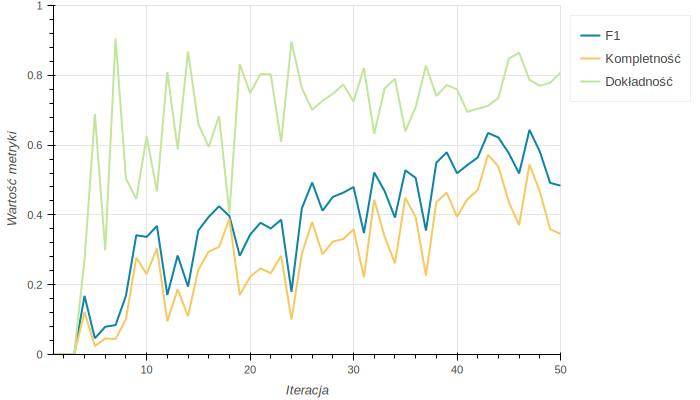

In [9]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania losowego)",
           x_axis_label="Iteracja",
           y_axis_label="Wartość metryki",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
p.y_range = Range1d(0, 1)
p.x_range = Range1d(1, 50)

p.line(random_iterations, random_fscores, legend_label="F1", color="#0B84A5", line_width=2)
p.line(random_iterations, random_recalls, legend_label="Kompletność", color="#F6C85F", line_width=2)
p.line(random_iterations, random_precs, legend_label="Dokładność", color="#C1E699", line_width=2)

p.add_layout(p.legend[0], "right")

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_random_metrics_on_iters_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)

display(SVG(filename=out_path))

## Jakość modelu na przestrzeni iteracji z użyciem strategi próbkowania _least-confidence_

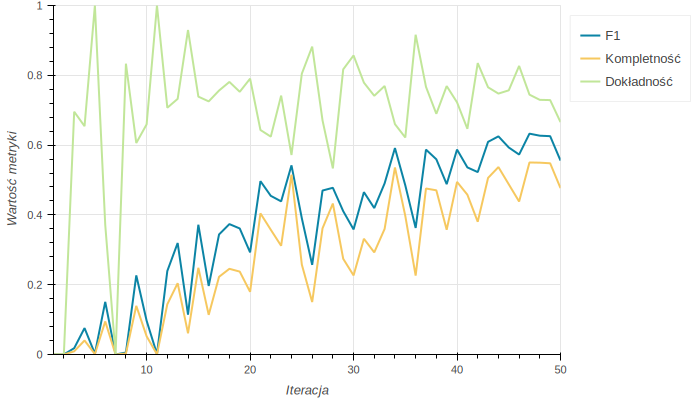

In [10]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania least-confidence)",
           x_axis_label="Iteracja",
           y_axis_label="Wartość metryki",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
p.y_range = Range1d(0, 1)
p.x_range = Range1d(1, 50)

p.line(lc_iterations, lc_fscores, legend_label="F1", color="#0B84A5", line_width=2)
p.line(lc_iterations, lc_recalls, legend_label="Kompletność", color="#F6C85F", line_width=2)
p.line(lc_iterations, lc_precs, legend_label="Dokładność", color="#C1E699", line_width=2)

p.add_layout(p.legend[0], "right")

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_leasconf_metrics_on_iters_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

## Jakość modelu na przestrzeni liczby encji z użyciem strategi próbkowania losowego

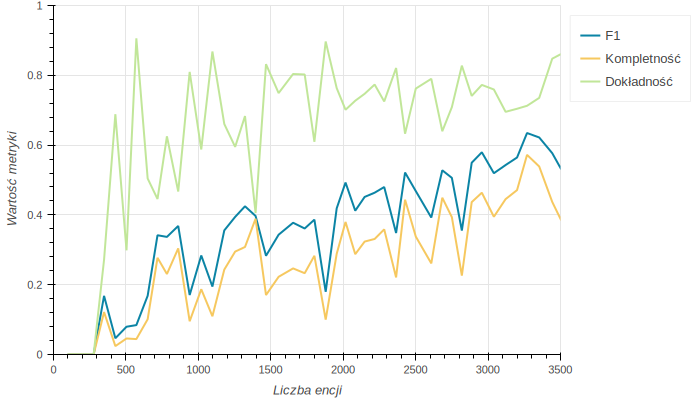

In [11]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania losowego)",
           x_axis_label="Liczba encji",
           y_axis_label="Wartość metryki",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
p.y_range = Range1d(0, 1)
p.x_range = Range1d(0, 3_500)

p.line(random_entities_num, random_fscores, legend_label="F1", color="#0B84A5", line_width=2)
p.line(random_entities_num, random_recalls, legend_label="Kompletność", color="#F6C85F", line_width=2)
p.line(random_entities_num, random_precs, legend_label="Dokładność", color="#C1E699", line_width=2)

p.add_layout(p.legend[0], "right")

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_random_metrics_on_ents_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))

## Jakość modelu na przestrzeni iteracji z użyciem strategi próbkowania _least-confidence_

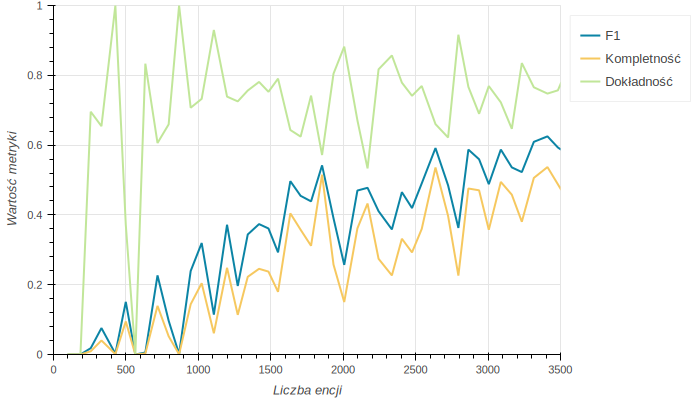

In [12]:
p = figure(
        #    title="Jakość modelu (strategia próbkowania least-confidence)",
           x_axis_label="Liczba encji",
           y_axis_label="Wartość metryki",
           width=700,
           height=400,
           output_backend="svg")
p.title.align = "center"
p.y_range = Range1d(0, 1)
p.x_range = Range1d(0, 3_500)

p.line(lc_entities_num, lc_fscores, legend_label="F1", color="#0B84A5", line_width=2)
p.line(lc_entities_num, lc_recalls, legend_label="Kompletność", color="#F6C85F", line_width=2)
p.line(lc_entities_num, lc_precs, legend_label="Dokładność", color="#C1E699", line_width=2)

p.add_layout(p.legend[0], "right")

# show(p)

out_path = FIGURES_DIR / f"{VISUALS_NAME}_leasconf_metrics_on_ents_{ITERATIONS}it_{N_INSTANCES}n.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))